In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3. Simple CNN models

In this notebook, we'll deploy and analyze the results of simple CNNs on our training, validation & testing data.

In [3]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from utils import split_data, image_generators

In [4]:
# Connect to GDrive files
drive = "drive/MyDrive"

# Save directory paths
train_dir = os.path.join(drive, "train")
val_dir = os.path.join(drive, "validation")
g_train_dir = os.path.join(train_dir, "glaucoma")
g_val_dir = os.path.join(val_dir, "glaucoma")
n_train_dir = os.path.join(train_dir, "normal")
n_val_dir = os.path.join(val_dir, "normal")

### 3.1 Define & choose network architecture

We'll create, visualize, and evaluate 3 different CNN architectures:
* 1 x convolutional, 1 x pooling, 1 x dense layers
- 2 x convolutional, 2 x pooling, 1 x dense layers
* 3 x convolutional, 3 x pooling, 1 x dense layers

We want to find the optimal number of convolutions for increasing the accuracy of our predictions without losing information from the dataset. We will also test how our performance is affected when we remove any of the pooling layers in the next section.

First off, we'll define the image size for the training and validation data as (178, 178), as it's the smallest resolution from the whole dataset. Secondly, we'll do a 80-20 train-validation split.

In [ ]:
# For running on local machine
# split_size = 0.8
#
# Save directory paths
# acrima_dir = os.path.join(os.getcwd(), "data/acrima-dataset")
# glaucoma_dir = os.path.join(acrima_dir, "glaucoma")
# normal_dir = os.path.join(acrima_dir, "normal")
# train_dir = os.path.join(acrima_dir, "train")
# val_dir = os.path.join(acrima_dir, "validation")
# g_train_dir = os.path.join(train_dir, "glaucoma")
# g_val_dir = os.path.join(val_dir, "glaucoma")
# n_train_dir = os.path.join(train_dir, "normal")
# n_val_dir = os.path.join(val_dir, "normal")
# 
# Train-validation split data
# split_data(glaucoma_dir, g_train_dir, g_val_dir, split_size)
# split_data(normal_dir, n_train_dir, n_val_dir, split_size)

In [54]:
# Define input datasets arguments
train_image_size = (178, 178)
val_image_size = (178, 178)

# Get image generators for training & validation data
train_gen, val_gen = image_generators(train_dir, val_dir, train_image_size, val_image_size)

Found 563 images belonging to 2 classes.
Found 142 images belonging to 2 classes.


We'll check to see how well each of the models is performing after only 5 epochs to then choose a model to refine. We chose:
* **ReLu activation** functions for the convolutions
- **Sigmoid activation** function for the output layer, as it's a binary classification problem
* **RMSprop optimizer**, as it applies gradient descent and automatically chooses a learning rate
- **Binary crossentropy loss**, as we're working on a binary classification problem

In [9]:
input_shape = (178, 178, 3)

#### 3.1.1. One layer model

In [ ]:
one_layer_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=input_shape, activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

one_layer_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),\
    loss='binary_crossentropy', metrics=['accuracy'])

history = one_layer_model.fit(train_gen,
                    epochs=5,
                    verbose=1,
                    validation_data=val_gen)

Epoch 1/5
29/29 [==============================] - 99s 3s/step - loss: 22.9461 - accuracy: 0.6199 - val_loss: 0.5475 - val_accuracy: 0.8310
Epoch 2/5
29/29 [==============================] - 96s 3s/step - loss: 1.0916 - accuracy: 0.7886 - val_loss: 0.2978 - val_accuracy: 0.8803
Epoch 3/5
29/29 [==============================] - 97s 3s/step - loss: 0.4454 - accuracy: 0.8668 - val_loss: 0.3139 - val_accuracy: 0.8592
Epoch 4/5
29/29 [==============================] - 94s 3s/step - loss: 0.3863 - accuracy: 0.8757 - val_loss: 0.1941 - val_accuracy: 0.9225
Epoch 5/5
29/29 [==============================] - 104s 4s/step - loss: 0.3972 - accuracy: 0.9059 - val_loss: 2.9187 - val_accuracy: 0.6338


**One-layer stats:** After 5 epochs, we get a training accuracy of 90.6% and a validation accuracy of 63.4%.

It seems that after the 5th epoch, the model begins to significantly overfit. Also, given the deep neural network has many more neurons compared to the other two networks, the training time is significantly higher.

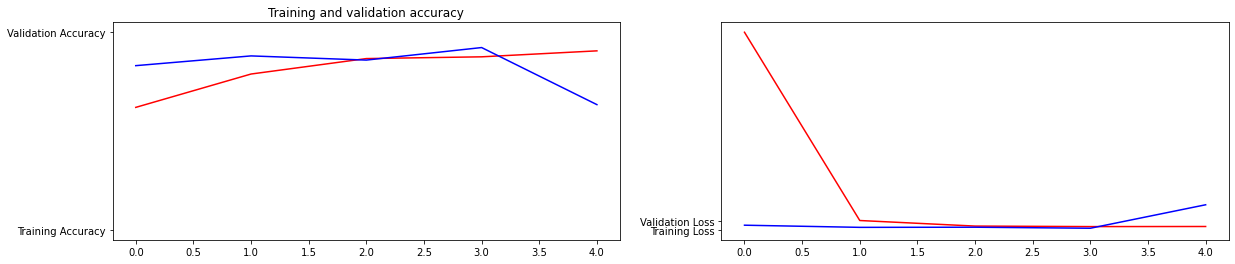

In [ ]:
# Visualize the training & validation accuracy to determine if model is overfitting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve number of epochs
epochs = range(len(acc)) 

ax, fig = plt.subplots(figsize=(20, 4))
plt.subplot(121)
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')

# Visualize the training & validation loss to determine if model is overfitting
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(122)
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

#### 3.1.2. Two-layer model

In [ ]:
two_layer_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

two_layer_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),\
    loss='binary_crossentropy', metrics=['accuracy'])

history = two_layer_model.fit(train_gen,
                    epochs=5,
                    verbose=1,
                    validation_data=val_gen)

Epoch 1/5
29/29 [==============================] - 46s 2s/step - loss: 4.1079 - accuracy: 0.6892 - val_loss: 0.4048 - val_accuracy: 0.8592
Epoch 2/5
29/29 [==============================] - 46s 2s/step - loss: 0.6476 - accuracy: 0.8188 - val_loss: 0.2900 - val_accuracy: 0.8803
Epoch 3/5
29/29 [==============================] - 47s 2s/step - loss: 0.3650 - accuracy: 0.8845 - val_loss: 0.2005 - val_accuracy: 0.9085
Epoch 4/5
29/29 [==============================] - 45s 2s/step - loss: 0.4087 - accuracy: 0.8650 - val_loss: 0.7124 - val_accuracy: 0.6972
Epoch 5/5
29/29 [==============================] - 45s 2s/step - loss: 0.2192 - accuracy: 0.9290 - val_loss: 0.2988 - val_accuracy: 0.9085


**Two-layer stats:** After 5 epochs, we get a training accuracy of 92.9% and a validation accuracy of 90.9%.

The two-layer model provides better results after 5 epochs compared to the one-layer model.

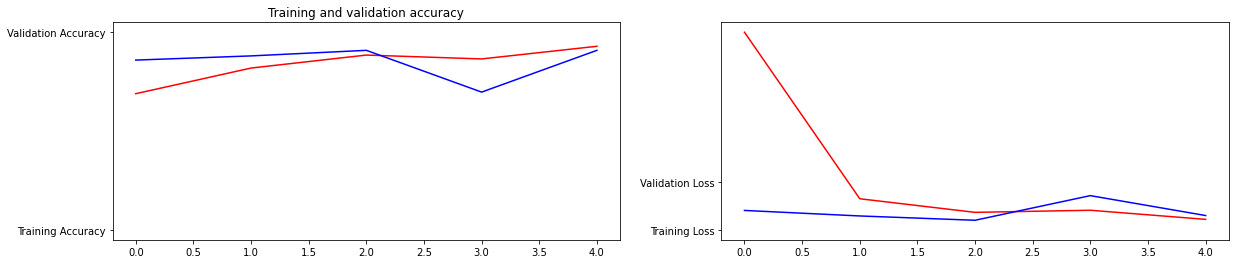

In [ ]:
# Visualize the training & validation accuracy to determine if model is overfitting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve number of epochs
epochs = range(len(acc)) 

ax, fig = plt.subplots(figsize=(20, 4))

plt.subplot(121)
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')

# Visualize the training & validation loss to determine if model is overfitting
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(122)
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

#### 3.1.3. Three-layer model

In [ ]:
three_layer_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), input_shape=input_shape, activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

three_layer_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),\
    loss='binary_crossentropy', metrics=['accuracy'])

history = three_layer_model.fit(train_gen,
                    epochs=5,
                    verbose=1,
                    validation_data=val_gen)

Epoch 1/5
29/29 [==============================] - 27s 881ms/step - loss: 1.1086 - accuracy: 0.6643 - val_loss: 0.5446 - val_accuracy: 0.6197
Epoch 2/5
29/29 [==============================] - 26s 887ms/step - loss: 0.4544 - accuracy: 0.8206 - val_loss: 0.3995 - val_accuracy: 0.8521
Epoch 3/5
29/29 [==============================] - 24s 822ms/step - loss: 0.3455 - accuracy: 0.8703 - val_loss: 0.3559 - val_accuracy: 0.8380
Epoch 4/5
29/29 [==============================] - 24s 818ms/step - loss: 0.4280 - accuracy: 0.8703 - val_loss: 0.2489 - val_accuracy: 0.8873
Epoch 5/5
29/29 [==============================] - 24s 835ms/step - loss: 0.3080 - accuracy: 0.8863 - val_loss: 0.2899 - val_accuracy: 0.8732


**Three-layer stats:** After 5 epochs, we get a training accuracy of 88.6% and a validation accuracy of 87.3%. 

The accuracy is lower than in the case of the two-layer network, suggesting that adding an additional convolution removes relevant data from the neural network. However, in this case the training & validation accuracy seem to converge.

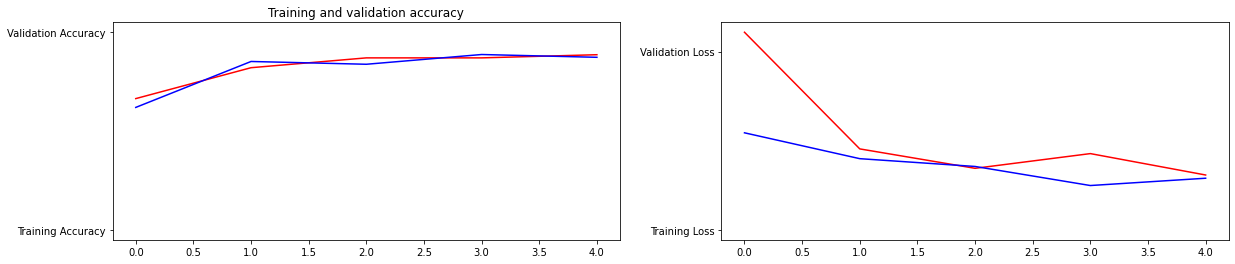

In [ ]:
# Visualize the training & validation accuracy to determine if model is overfitting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve number of epochs
epochs = range(len(acc)) 

ax, fig = plt.subplots(figsize=(20, 4))
plt.subplot(121)
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')

# Visualize the training & validation loss to determine if model is overfitting
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(122)
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

### 3.2. Hyperparameter tuning

We'll now try to optimize our two-layer neural network which we'll then test on the Kaggle dataset.

In [22]:
import numpy as np
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [11]:
def create_model():
  two_layer_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

  two_layer_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),\
    loss='binary_crossentropy', metrics=['accuracy'])
  
  return two_layer_model

To use GridSearchCV with our image generators we need to unwrap the augmented images from the generators. To do so, I explored the `train_gen` `keras.preprocessing.image.DirectoryIterator` object.

In [31]:
print("train_gen type:", type(train_gen))
print("train_gen[0] type", type(train_gen[0]))
print("train_gen[0][0] type", type(train_gen[0][0]))
print("train_gen[0][0][0] type", type(train_gen[0][0][0]))

train_gen type: <class 'keras.preprocessing.image.DirectoryIterator'>
train_gen[0] type <class 'tuple'>
train_gen[0][0] type <class 'numpy.ndarray'>
train_gen[0][0][0] type <class 'numpy.ndarray'>


In [33]:
print("train_gen length:", len(train_gen))
print("train_gen[0] length", len(train_gen[0]))
print("train_gen[0][0] shape", train_gen[0][0].shape)
print("train_gen[0][0][0] shape", train_gen[0][0][0].shape)

train_gen length: 29
train_gen[0] length 2
train_gen[0][0] shape (20, 178, 178, 3)
train_gen[0][0][0] shape (178, 178, 3)


We notice that each element in the `train_gen`corresponds to the number of samples in a batch. Then, the elements in the `train_gen[x]` tuples are the batches of augmented images for each class, **glaucoma** & **normal**. Therefore, we need to iterate through each batch and class to get the input augmented images and their label for `GridSearchCV`.

In [49]:
def extract_images(generator, classes=["0", "1"]):

  no_of_batches = len(generator)
  no_of_classes = len(generator[0])
  no_of_samples = generator[0][0].shape[0]
  no_of_examples = no_of_batches * no_of_classes * no_of_samples

  X_shape = input_shape 
  y_shape = 1

  X = np.empty(X_shape)
  y = np.empty(y_shape)

  for batch in generator:
    print(len(batch))
    for i, a_class in enumerate(batch):
      print(i)
      print(a_class.shape)
      for image in a_class:
        print(image.shape)
        X = np.vstack([X, image])
        y = np.vstack([y, classes[i]])

  return X, y

In [36]:
# Figure out which class is 0 and which is 1
train_gen.class_indices

{'glaucoma': 0, 'normal': 1}

In [50]:
classes = ["glaucoma", "normal"]

X_train, y_train = extract_images(train_gen, classes)
X_val, y_val = extract_images(val_gen, classes)

2
0
(20, 178, 178, 3)
(178, 178, 3)
(178, 178, 3)
(178, 178, 3)
(178, 178, 3)
(178, 178, 3)
(178, 178, 3)
(178, 178, 3)
(178, 178, 3)
(178, 178, 3)
(178, 178, 3)
(178, 178, 3)
(178, 178, 3)
(178, 178, 3)
(178, 178, 3)
(178, 178, 3)
(178, 178, 3)
(178, 178, 3)
(178, 178, 3)
(178, 178, 3)
(178, 178, 3)
1
(20,)
()


ValueError: ignored

In [ ]:
X = np.vstack([X_train, X_val])
y = np.vstack([y_train, y_val])

In [ ]:
# Fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# Define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 20, 30, 40, 50]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=create_model(), param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


#### 3.2.1. Batch size & number of epochs

### 3.3. Model evaluation

We'll evaluate the final neural network on the Kaggle dataset.